In [2]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

17465344/17464789 [==============================] - 2s 0us/step


In [4]:
### decode to English
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]
)
decode_review = ' '.join(
    [reverse_word_index.get(i -3, '?') for i in train_data[0]]
)

In [5]:
decode_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

### Vectorize input 

In [6]:
import numpy as np

def vectorize_sequence(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

In [7]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

### Vectorize labels

In [8]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

### Building network

In [14]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# model.compile(optimizer='rmsprop',
#               loss='binary_crossentropy',
#               metrics=['acuracy']
#              )

#### Creating a validation set

In [15]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

#### Train model for 20 epochs 
- a minibatch of 512 samples

In [18]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['acc']
             )

history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 113us/step - loss: 0.5499 - acc: 0.7677 - val_loss: 0.4321 - val_acc: 0.8679
Epoch 2/20
15000/15000 [==============================] - 1s 82us/step - loss: 0.3465 - acc: 0.8951 - val_loss: 0.3438 - val_acc: 0.8659
Epoch 3/20
15000/15000 [==============================] - 1s 83us/step - loss: 0.2509 - acc: 0.9210 - val_loss: 0.2903 - val_acc: 0.8905
Epoch 4/20
15000/15000 [==============================] - 1s 82us/step - loss: 0.1935 - acc: 0.9389 - val_loss: 0.2844 - val_acc: 0.8886
Epoch 5/20
15000/15000 [==============================] - 1s 80us/step - loss: 0.1574 - acc: 0.9508 - val_loss: 0.2946 - val_acc: 0.8837
Epoch 6/20
15000/15000 [==============================] - 1s 81us/step - loss: 0.1281 - acc: 0.9613 - val_loss: 0.2897 - val_acc: 0.8871
Epoch 7/20
15000/15000 [==============================] - 1s 82us/step - loss: 0.1066 - acc: 0.9689 - val_loss: 0.3089 - val_ac

In [19]:
history_dict = history.history

In [20]:
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

#### Plot data

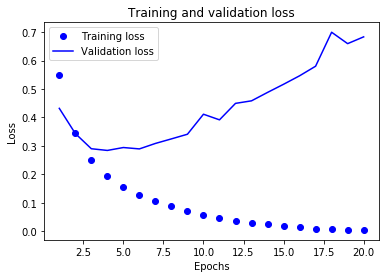

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['acc']
val_acc = history_dict['val_acc']

epochs = range(1, len(acc)+1)

plt.plot(epochs, loss_values, 'bo', label="Training loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

<function matplotlib.pyplot.legend(*args, **kwargs)>

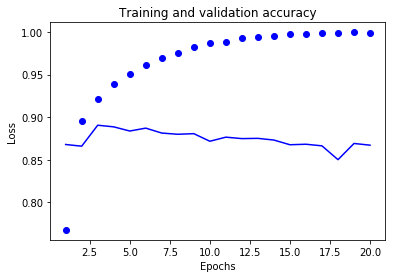

In [25]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label="Training acc")
plt.plot(epochs, val_acc, 'b', label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel('Epochs')
plt.ylabel("Loss")
plt.legend

### Train a model from scratch

In [26]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy']
             )

history2 = model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 68us/step - loss: 0.4759 - acc: 0.8214
Epoch 2/4
25000/25000 [==============================] - 1s 52us/step - loss: 0.2661 - acc: 0.9094
Epoch 3/4
25000/25000 [==============================] - 1s 52us/step - loss: 0.1985 - acc: 0.9298
Epoch 4/4
25000/25000 [==============================] - 1s 41us/step


In [28]:
history2.history.keys()

dict_keys(['loss', 'acc'])

In [29]:
results

[0.32371350823402406, 0.873]